In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP


# import utils
import json
from datetime import date

Running on Colab?
yes
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']
config_dir = os.path.join('configs')

## Simple Mean Experiment 

In [5]:
with open(os.path.join(config_dir,'paper_model_config_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

In [6]:
default_conf

{'cnp_params': {'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'},
  'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'fix_num_contxt': False,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.GaussianProcess',
  'gamma': 1,
  'length_scale': 0.4,
  'noise': 0.0004,
  'num_instances_test': 10,
  'num_instances_train': 64,
  'num_instances_vali': 10},
 'experiment_params': {'dim_observation': 400,
  'dimx': 1,
  'lr': 0.001,
  'n_epochs': 200000,
  'range_x': [-2, 2],
  'seed': None,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_test': 3,
  'batch_size_train': 64,
  'batch_size_vali': 3,
  'plotting': True,
  'print_after': 5000}}

In [8]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)


In [9]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         1.466
Mean Validation loss after 0 equals                     1.224

Validation loss for the function plotted:                 0.932


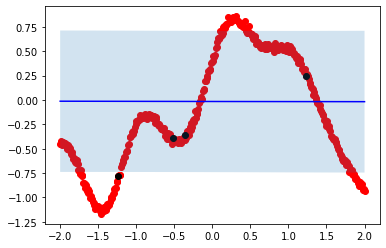

  2%|▏         | 4998/200000 [01:32<1:01:35, 52.77it/s]

Mean training loss at epoch 5000 :                         1.166
Mean Validation loss after 5000 equals                     1.277

Validation loss for the function plotted:                 1.941


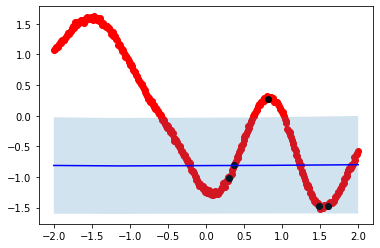

  5%|▍         | 9999/200000 [03:04<59:12, 53.48it/s]

Mean training loss at epoch 10000 :                         0.115
Mean Validation loss after 10000 equals                     2.297

Validation loss for the function plotted:                 2.043


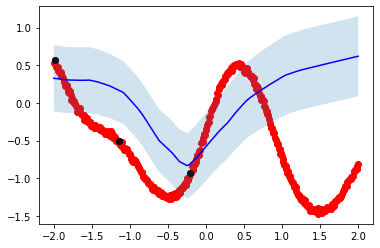

  7%|▋         | 14996/200000 [04:36<59:41, 51.66it/s]

Mean training loss at epoch 15000 :                         -0.337
Mean Validation loss after 15000 equals                     1.621

Validation loss for the function plotted:                 2.848


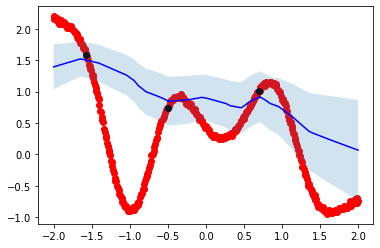

 10%|▉         | 19996/200000 [06:10<54:20, 55.21it/s]

Mean training loss at epoch 20000 :                         0.196
Mean Validation loss after 20000 equals                     1.812

Validation loss for the function plotted:                 2.939


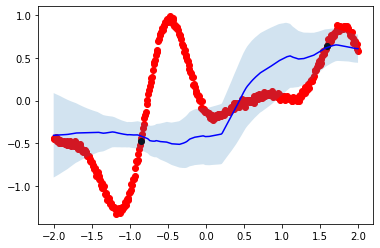

 12%|█▏        | 24998/200000 [07:40<53:08, 54.89it/s]

Mean training loss at epoch 25000 :                         0.207
Mean Validation loss after 25000 equals                     1.342

Validation loss for the function plotted:                 0.336


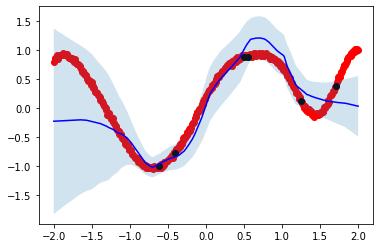

 15%|█▍        | 29997/200000 [09:12<51:02, 55.51it/s]

Mean training loss at epoch 30000 :                         -0.117
Mean Validation loss after 30000 equals                     0.916

Validation loss for the function plotted:                 1.045


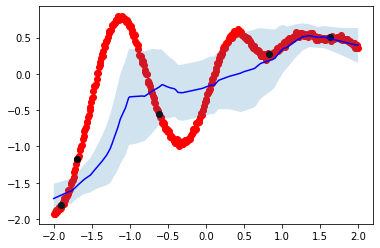

 17%|█▋        | 34997/200000 [10:45<51:26, 53.47it/s]

Mean training loss at epoch 35000 :                         0.008
Mean Validation loss after 35000 equals                     1.205

Validation loss for the function plotted:                 1.54


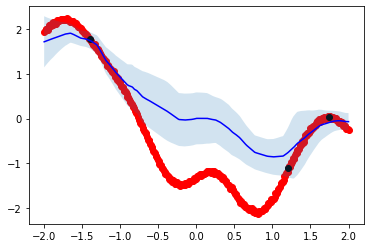

 20%|█▉        | 39998/200000 [12:17<52:14, 51.04it/s]

Mean training loss at epoch 40000 :                         0.061
Mean Validation loss after 40000 equals                     1.32

Validation loss for the function plotted:                 2.184


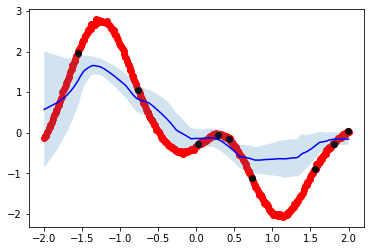

 22%|██▏       | 44995/200000 [13:51<49:46, 51.90it/s]

Mean training loss at epoch 45000 :                         -0.382
Mean Validation loss after 45000 equals                     1.046

Validation loss for the function plotted:                 1.213


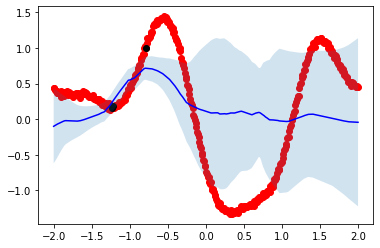

 25%|██▍       | 49999/200000 [15:26<46:19, 53.96it/s]

Mean training loss at epoch 50000 :                         -0.097
Mean Validation loss after 50000 equals                     0.803

Validation loss for the function plotted:                 0.47


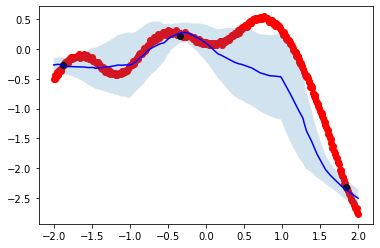

 27%|██▋       | 54999/200000 [17:02<47:17, 51.11it/s]

Mean training loss at epoch 55000 :                         0.322
Mean Validation loss after 55000 equals                     1.399

Validation loss for the function plotted:                 0.973


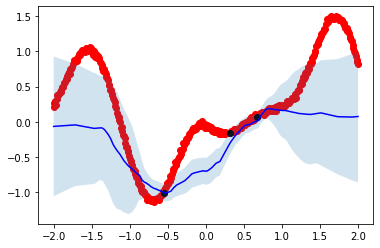

 30%|███       | 60000/200000 [18:42<45:50, 50.91it/s]

Mean training loss at epoch 60000 :                         -0.822
Mean Validation loss after 60000 equals                     1.713

Validation loss for the function plotted:                 0.538


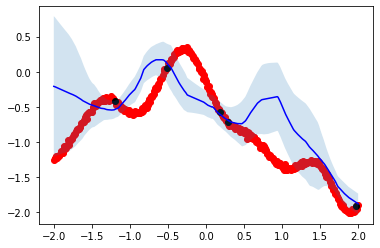

 32%|███▏      | 64998/200000 [20:24<43:57, 51.19it/s]

Mean training loss at epoch 65000 :                         -0.916
Mean Validation loss after 65000 equals                     1.658

Validation loss for the function plotted:                 2.645


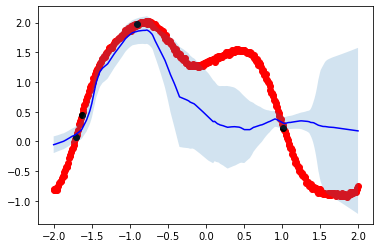

 35%|███▍      | 69999/200000 [22:06<43:35, 49.71it/s]

Mean training loss at epoch 70000 :                         -0.259
Mean Validation loss after 70000 equals                     1.441

Validation loss for the function plotted:                 0.916


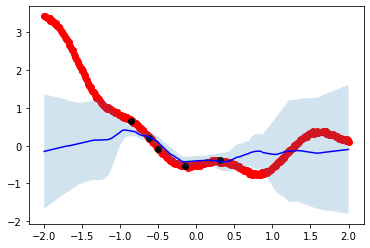

 37%|███▋      | 74998/200000 [23:51<43:29, 47.89it/s]

Mean training loss at epoch 75000 :                         -0.452
Mean Validation loss after 75000 equals                     1.151

Validation loss for the function plotted:                 0.365


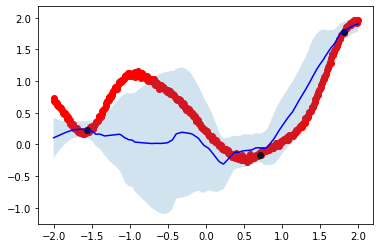

 40%|████      | 80000/200000 [25:41<42:19, 47.25it/s]

Mean training loss at epoch 80000 :                         -0.426
Mean Validation loss after 80000 equals                     2.384

Validation loss for the function plotted:                 3.002


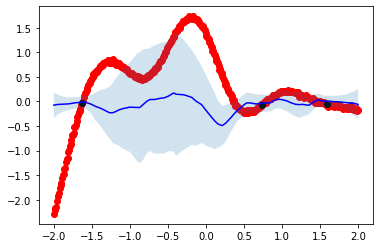

 42%|████▏     | 84996/200000 [27:32<42:52, 44.71it/s]

Mean training loss at epoch 85000 :                         -0.335
Mean Validation loss after 85000 equals                     1.313

Validation loss for the function plotted:                 0.787


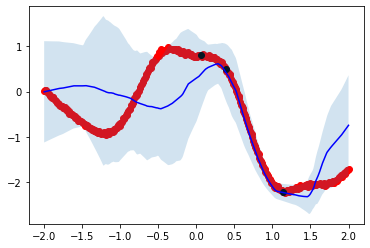

 45%|████▍     | 89998/200000 [29:24<40:33, 45.21it/s]

Mean training loss at epoch 90000 :                         -0.101
Mean Validation loss after 90000 equals                     1.863

Validation loss for the function plotted:                 2.125


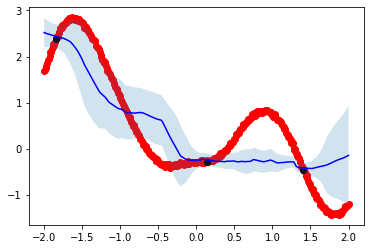

 47%|████▋     | 94998/200000 [31:18<38:49, 45.07it/s]

Mean training loss at epoch 95000 :                         -0.312
Mean Validation loss after 95000 equals                     0.827

Validation loss for the function plotted:                 0.322


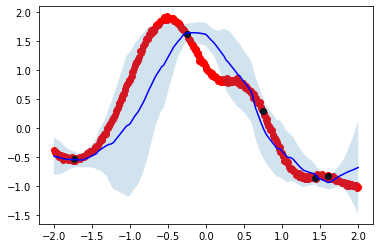

 50%|████▉     | 99998/200000 [33:13<38:21, 43.45it/s]

Mean training loss at epoch 100000 :                         -0.081
Mean Validation loss after 100000 equals                     1.007

Validation loss for the function plotted:                 0.893


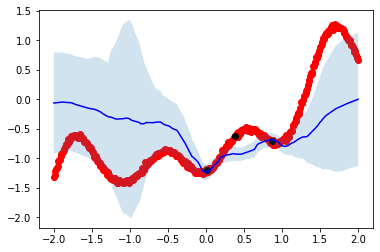

 52%|█████▏    | 104997/200000 [35:12<36:33, 43.30it/s]

Mean training loss at epoch 105000 :                         -0.352
Mean Validation loss after 105000 equals                     0.662

Validation loss for the function plotted:                 0.106


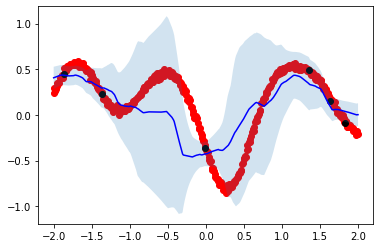

 55%|█████▍    | 109996/200000 [37:06<33:34, 44.67it/s]

Mean training loss at epoch 110000 :                         -0.786
Mean Validation loss after 110000 equals                     1.165

Validation loss for the function plotted:                 1.518


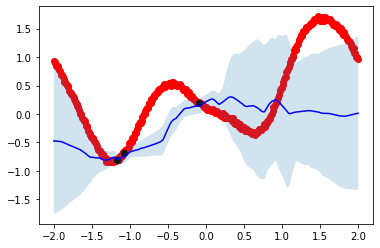

 57%|█████▋    | 114996/200000 [39:03<32:48, 43.17it/s]

Mean training loss at epoch 115000 :                         -1.069
Mean Validation loss after 115000 equals                     1.09

Validation loss for the function plotted:                 1.294


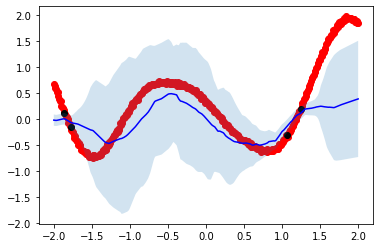

 60%|██████    | 120000/200000 [41:01<31:53, 41.80it/s]

Mean training loss at epoch 120000 :                         0.124
Mean Validation loss after 120000 equals                     0.562

Validation loss for the function plotted:                 -0.1


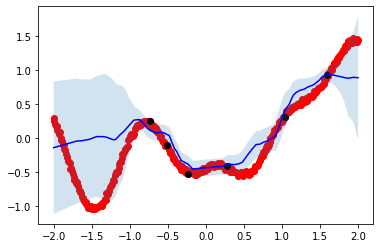

 62%|██████▏   | 124997/200000 [42:59<28:48, 43.40it/s]

Mean training loss at epoch 125000 :                         -0.995
Mean Validation loss after 125000 equals                     0.951

Validation loss for the function plotted:                 0.705


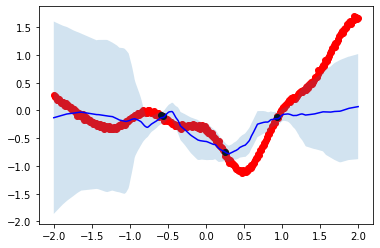

 65%|██████▍   | 129998/200000 [44:53<27:19, 42.70it/s]

Mean training loss at epoch 130000 :                         -0.819
Mean Validation loss after 130000 equals                     0.902

Validation loss for the function plotted:                 0.097


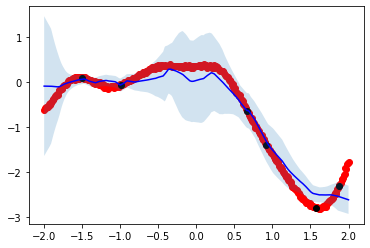

 68%|██████▊   | 135000/200000 [46:46<25:04, 43.21it/s]

Mean training loss at epoch 135000 :                         0.632
Mean Validation loss after 135000 equals                     1.074

Validation loss for the function plotted:                 0.476


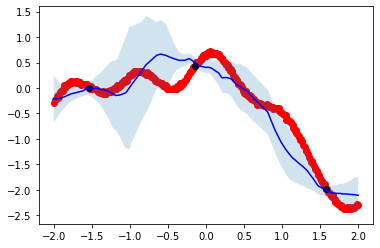

 70%|██████▉   | 139999/200000 [48:44<23:31, 42.50it/s]

Mean training loss at epoch 140000 :                         1.333
Mean Validation loss after 140000 equals                     1.077

Validation loss for the function plotted:                 0.813


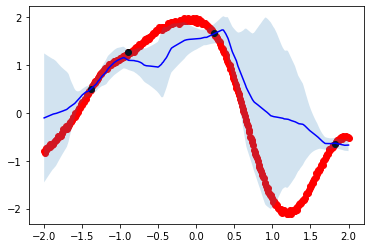

 72%|███████▎  | 145000/200000 [50:43<22:06, 41.46it/s]

Mean training loss at epoch 145000 :                         -0.386
Mean Validation loss after 145000 equals                     0.998

Validation loss for the function plotted:                 1.812


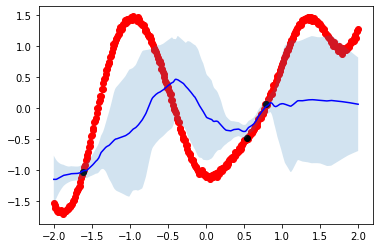

 75%|███████▍  | 149999/200000 [52:40<19:38, 42.43it/s]

Mean training loss at epoch 150000 :                         -0.641
Mean Validation loss after 150000 equals                     0.816

Validation loss for the function plotted:                 0.189


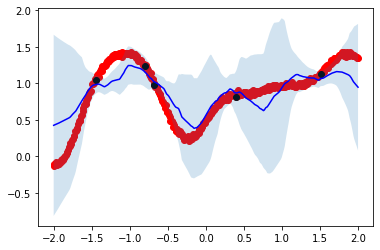

 78%|███████▊  | 155000/200000 [54:39<18:09, 41.32it/s]

Mean training loss at epoch 155000 :                         -1.082
Mean Validation loss after 155000 equals                     1.301

Validation loss for the function plotted:                 1.391


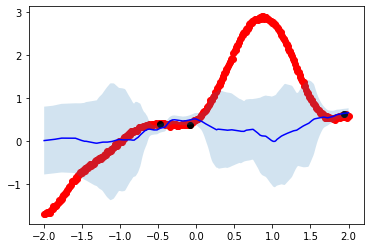

 80%|███████▉  | 159998/200000 [56:40<16:26, 40.56it/s]

Mean training loss at epoch 160000 :                         -1.154
Mean Validation loss after 160000 equals                     1.07

Validation loss for the function plotted:                 -0.161


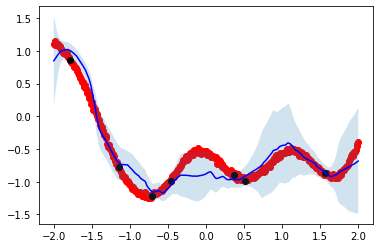

 82%|████████▏ | 164999/200000 [58:39<14:01, 41.58it/s]

Mean training loss at epoch 165000 :                         -0.62
Mean Validation loss after 165000 equals                     1.535

Validation loss for the function plotted:                 2.821


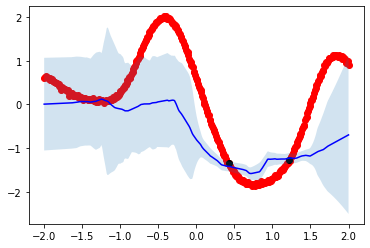

 85%|████████▌ | 170000/200000 [1:00:38<11:55, 41.94it/s]

Mean training loss at epoch 170000 :                         0.192
Mean Validation loss after 170000 equals                     2.107

Validation loss for the function plotted:                 3.351


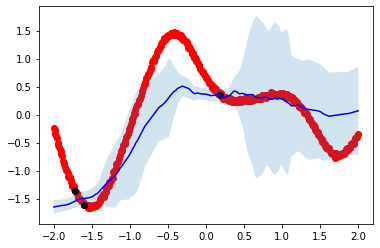

 87%|████████▋ | 174997/200000 [1:02:37<09:52, 42.20it/s]

Mean training loss at epoch 175000 :                         -0.009
Mean Validation loss after 175000 equals                     1.607

Validation loss for the function plotted:                 0.944


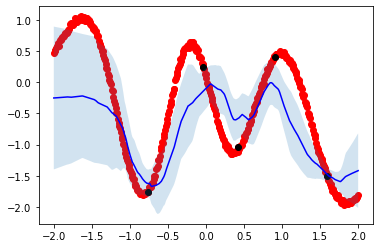

 90%|████████▉ | 179997/200000 [1:04:36<07:47, 42.74it/s]

Mean training loss at epoch 180000 :                         -0.653
Mean Validation loss after 180000 equals                     1.31

Validation loss for the function plotted:                 0.335


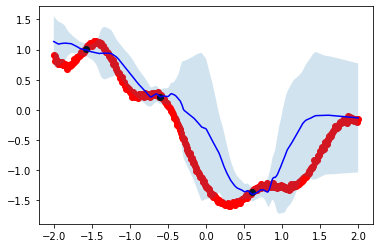

 92%|█████████▎| 185000/200000 [1:06:34<05:54, 42.31it/s]

Mean training loss at epoch 185000 :                         -0.465
Mean Validation loss after 185000 equals                     1.922

Validation loss for the function plotted:                 2.982


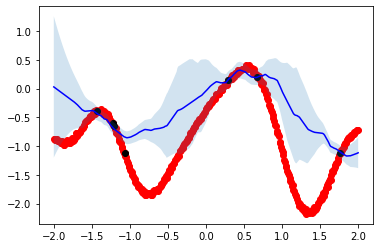

 95%|█████████▍| 189997/200000 [1:08:32<03:47, 44.01it/s]

Mean training loss at epoch 190000 :                         -0.878
Mean Validation loss after 190000 equals                     1.02

Validation loss for the function plotted:                 0.614


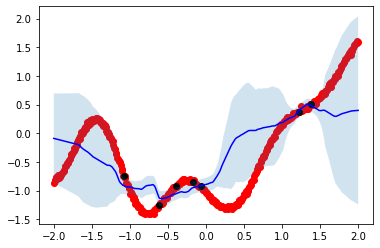

 98%|█████████▊| 195000/200000 [1:10:33<02:03, 40.38it/s]

Mean training loss at epoch 195000 :                         -0.75
Mean Validation loss after 195000 equals                     0.697

Validation loss for the function plotted:                 0.695


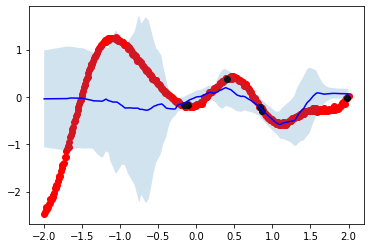

100%|██████████| 200000/200000 [1:12:30<00:00, 45.97it/s]


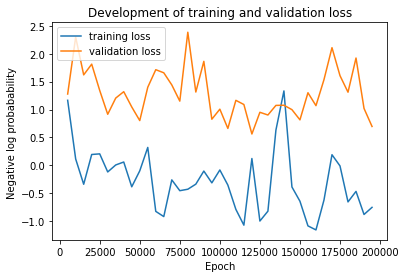

In [10]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

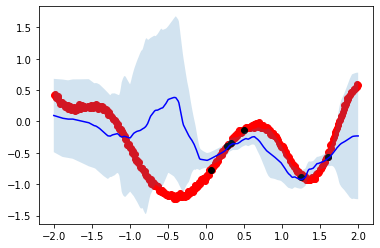

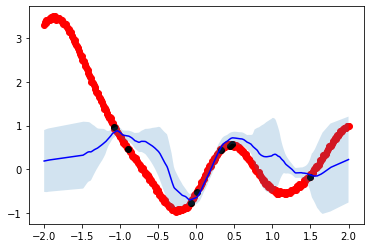

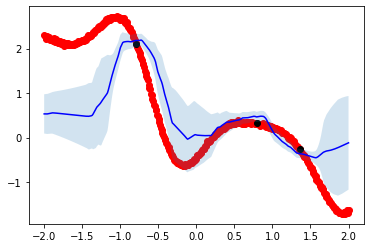

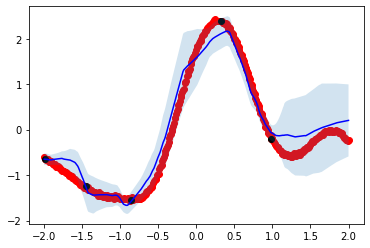

0.40400904417037964


In [11]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [26]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss, MSE]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results('', '1dpaper_simple_mean_agregation', to_save)


In [24]:
google_colab

'yes'

In [21]:
!ls 

architecture_improvement  neural_processes.egg-info  setup.py
cnp			  notebooks		     test
configs			  notes			     tests
data			  README.md		     tfm
experiments		  requirements_local.txt
LICENSE			  requirements.txt


In [22]:
! rmdir test